## Observations and Insights 

**Obervations:**

**1. The bar graph by drug regimen shows the maximum number of mice (230) for Capomulin, and Prooriva had the least number of mice at 148. We were able to remove any duplicate mice and by doing so the total count of mice was 248. The number of male (125 or 50.4%) vs female (123 or 49.6%) mice can be seen in the pie graph.**


**2. The correlation between mouse weight and average tumor volume was 0.84. This is a positive correlation, as the weight of the mouse increases the average tumor volume increases.**


**3. The regression model let's us understand how the average tumor volume, which is the dependent variable will change when the weight of the mouse changes, this is the independent variable. The regression model helped show that 70% of the model fit the data, this was determined by the r-square value of 0.70, which is a good indicator to predict data from the model. The higher the r-square the smaller the differences between the data points.**


**4. With the 4 selected durg regimen (Capomulin, Ramicane, Infubinol, and Ceftamin) Capomulin and Ramicane help reduce the size of tummors better then the other two.**


In [1]:
%matplotlib notebook

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_merge = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [42]:
# Checking the number of mice.
total_mice = len(mouse_data_merge["Mouse ID"].value_counts())

count_mice = pd.DataFrame({"Number of Mice": [total_mice]})
count_mice

,Number of Mice
0,249


In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_merge.loc[mouse_data_merge.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = pd.DataFrame(duplicate_mice)
all_duplicate_mice

,0
0,g989


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_merge[mouse_data_merge['Mouse ID'].isin(duplicate_mice)==False]

In [46]:
# Checking the number of mice in the clean DataFrame.
mice_clean_data = clean_df["Mouse ID"].value_counts()
count_mice_clean = len(mice_clean_data)
count_mice_clean

248

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_summary = clean_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_mean = data_summary['Tumor Volume (mm3)'].mean()
drug_median = data_summary['Tumor Volume (mm3)'].median()
drug_stdev = data_summary['Tumor Volume (mm3)'].std()
drug_sem = data_summary['Tumor Volume (mm3)'].sem()

data_summary_group_df = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median,
                                     'Standard Deviation': drug_stdev, 'SEM': drug_sem})
data_summary_group_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_summary_stats = data_summary.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
data_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_measurements = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']
pandas_bar_plot = number_measurements.plot.bar(figsize=(10,5), color='b', fontsize = 12)
pandas_bar_plot
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Measurements Taken",fontsize = 20)

plt.savefig("../images/PandasBarChart.png")
plt.show()
number_measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


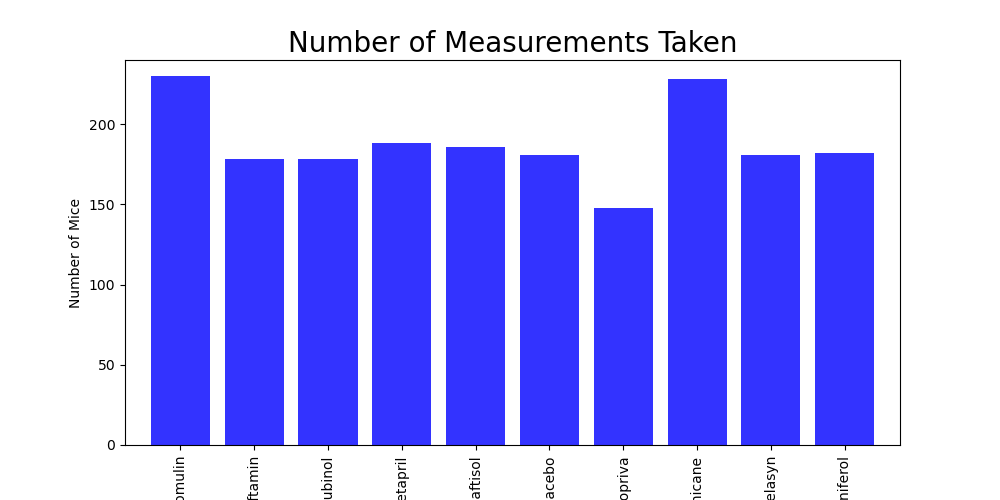

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [75]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#count the number of measurements for each drug 
drug_measurement = (clean_df.groupby(["Drug Regimen"])["Mouse ID"].count())
drug_measurement
#Set x axis
x_axis = np.arange(len(number_measurements))
fig1, ax1 = plt.subplots(figsize=(10,5))
plt.bar(x_axis, drug_measurement, color='b', alpha=0.8, align='center')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_measurement)+10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Measurements Taken",fontsize = 20)

plt.savefig("../images/PypoltBarChart.png", bbox_inches = "tight")

drug_measurement

In [51]:
#count mice by gender and percentage
group_gender = clean_df.groupby(["Mouse ID", "Sex"])
group_gender_df = pd.DataFrame(group_gender.size())
#data frame to count by gender
mice_gender = pd.DataFrame(group_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]
#Calc Percentage 
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))

mice_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


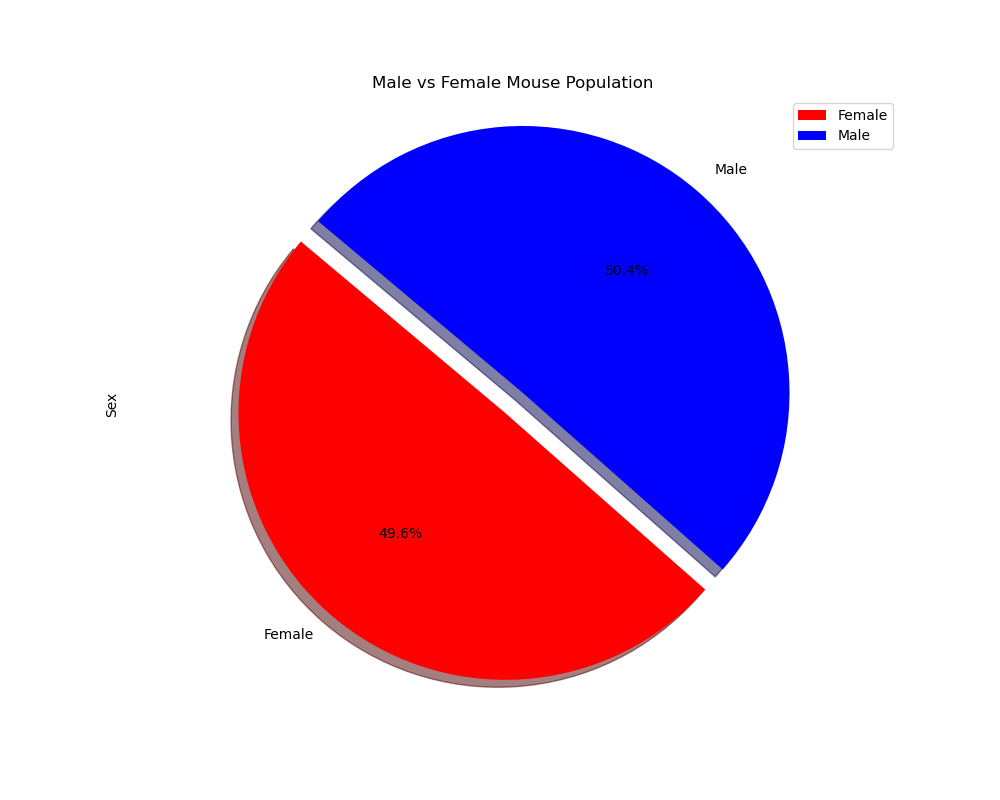

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['red', 'blue']
explode = (0.1, 0)
pie_plot = mice_gender.plot.pie(y='Total Count', figsize=(10,8), colors = colors, startangle=140,
                               explode = explode, shadow = True, autopct = "%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")

plt.savefig("../images/PandasPieChart.png")
plt.show()

<IPython.core.display.Javascript object>


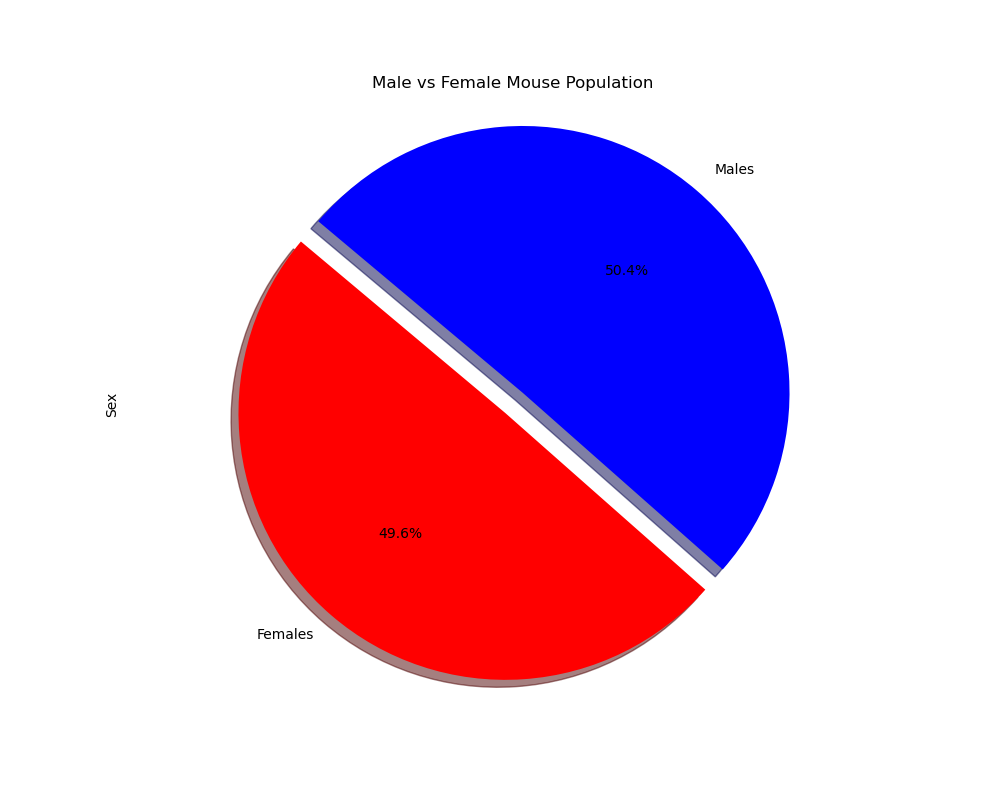

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels for Pie Chart
labels = ["Females", "Males"]
#size values
sizes = [49.596774, 50.403226]
#colors
colors = ['red', 'blue']
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")

plt.savefig("../images/PyPlotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse by Drug regimen
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [55]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor Volume is: {lowerq}")
print(f"The upper quartile of Capomulin Tumor Volume is: {upperq}")
print(f"The interquartile range of Capomulin Tumor Volume is: {iqr}")
print(f"The median of Capomulin Tumor Volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} coulb be outliers.")

The lower quartile of Capomulin Tumor Volume is: 32.37735684
The upper quartile of Capomulin Tumor Volume is: 40.1592203
The interquartile range of Capomulin Tumor Volume is: 7.781863460000004
The median of Capomulin Tumor Volume is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 coulb be outliers.


In [56]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [57]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumor Volume is: {lowerq}")
print(f"The upper quartile of Ramicane Tumor Volume is: {upperq}")
print(f"The interquartile range of Ramicane Tumor Volume is: {iqr}")
print(f"The median of Ramicane Tumor Volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} coulb be outliers.")

The lower quartile of Ramicane Tumor Volume is: 31.56046955
The upper quartile of Ramicane Tumor Volume is: 40.65900627
The interquartile range of Ramicane Tumor Volume is: 9.098536719999998
The median of Ramicane Tumor Volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 coulb be outliers.


In [58]:
#Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [59]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Volume is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Volume is: {upperq}")
print(f"The interquartile range of Infubinol Tumor Volume is: {iqr}")
print(f"The median of Infubinol Tumor Volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} coulb be outliers.")

The lower quartile of Infubinol Tumor Volume is: 54.04860769
The upper quartile of Infubinol Tumor Volume is: 65.52574285
The interquartile range of Infubinol Tumor Volume is: 11.477135160000003
The median of Infubinol Tumor Volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 coulb be outliers.


In [60]:
#Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Infubinol_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [61]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumor Volume is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumor Volume is: {upperq}")
print(f"The interquartile range of Ceftamin Tumor Volume is: {iqr}")
print(f"The median of Ceftamin Tumor Volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} coulb be outliers.")

The lower quartile of Ceftamin Tumor Volume is: 54.04860769
The upper quartile of Ceftamin Tumor Volume is: 65.52574285
The interquartile range of Ceftamin Tumor Volume is: 11.477135160000003
The median of Ceftamin Tumor Volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 coulb be outliers.


<IPython.core.display.Javascript object>


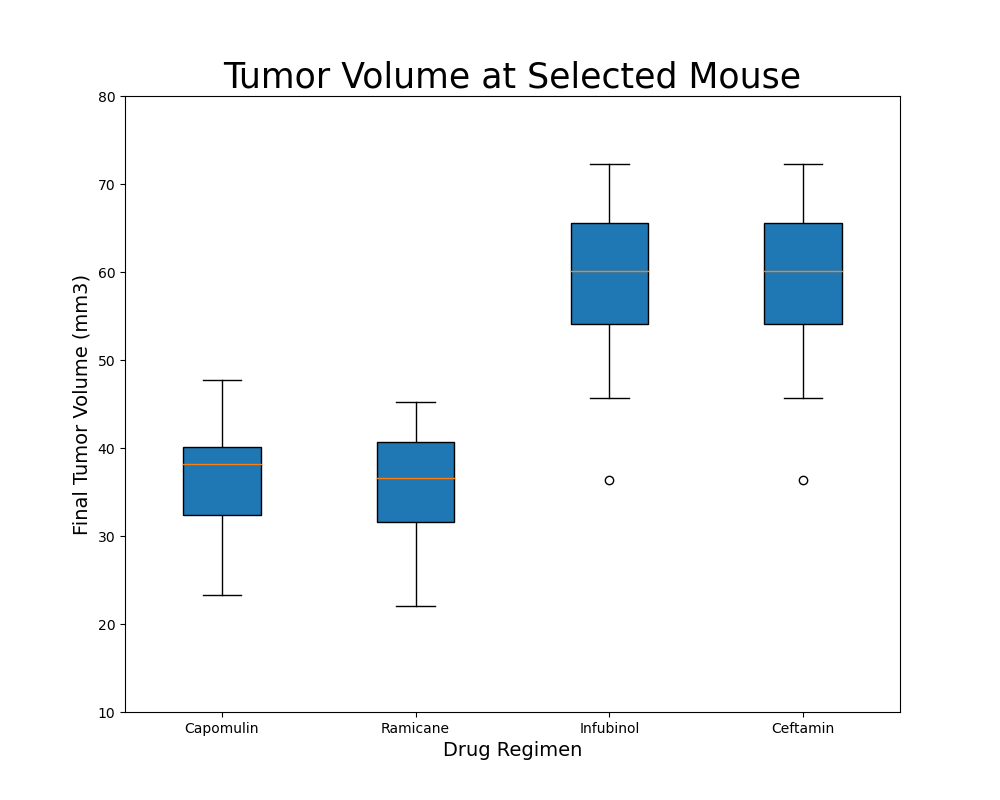

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
drug_regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(data_plot, labels=drug_regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/Pyboxplot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Mouse ID 'g316'
linepolt_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
linepolt_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1815,g316,0,45.000000,0,Capomulin,Female,22,22
1816,g316,5,44.022752,0,Capomulin,Female,22,22
1817,g316,10,44.502042,0,Capomulin,Female,22,22
1818,g316,15,45.216743,0,Capomulin,Female,22,22
1819,g316,20,45.933322,1,Capomulin,Female,22,22


<IPython.core.display.Javascript object>


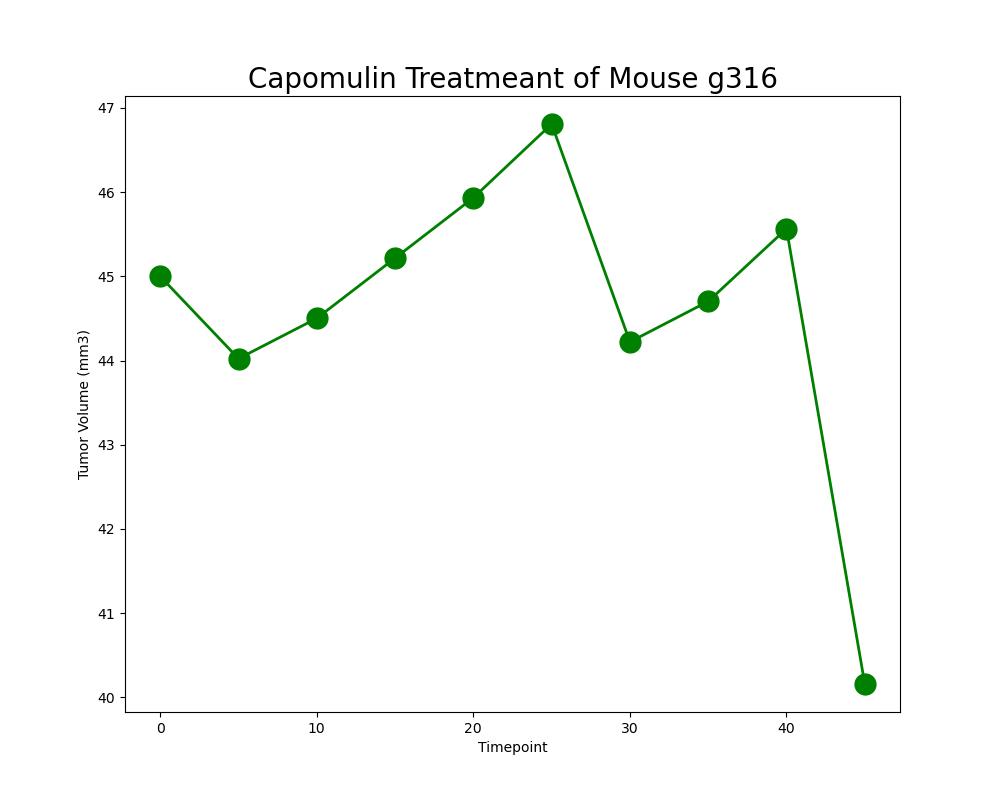

In [71]:
#line polt
x_axis = linepolt_df["Timepoint"]
tumor_vol = linepolt_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.title('Capomulin Treatmeant of Mouse g316',fontsize =20)
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=15,marker="o",color="green", label="Fahreneit")
plt.xlabel('Timepoint',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)

plt.savefig("../Images/linepolt.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


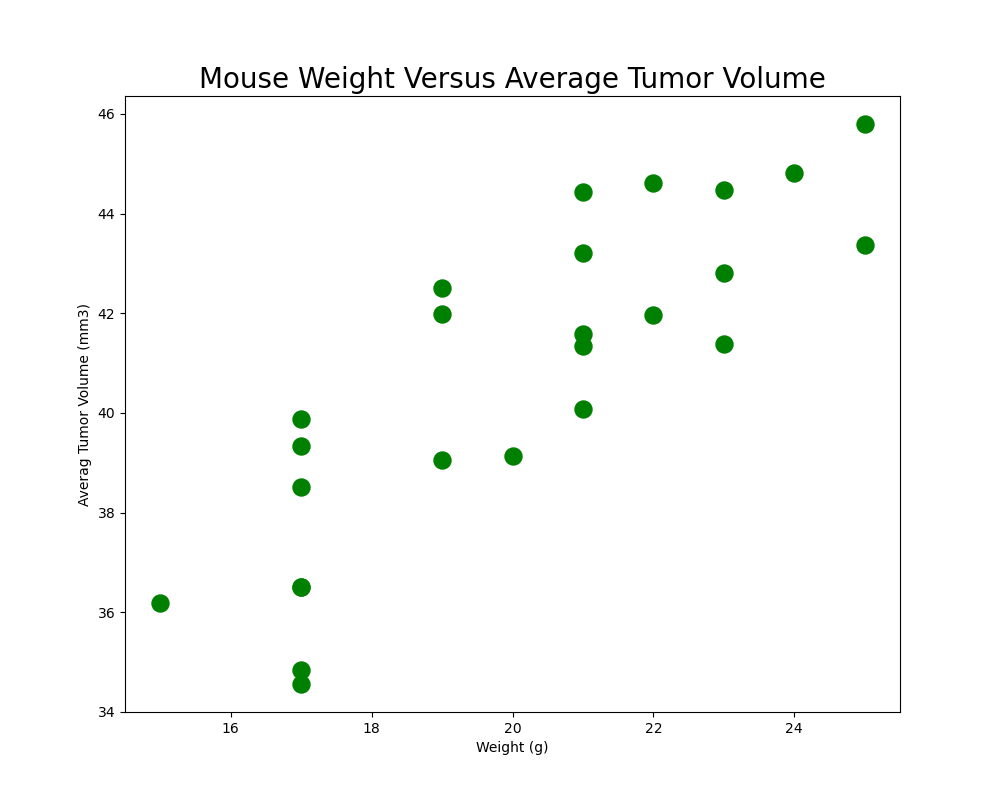

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 8))
avg_capomulin_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'],s=150, color="green")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)

plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [67]:
x_values = avg_capomulin_vol['Weight (g)']
y_values = avg_capomulin_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.12754359033201337
y = 0.95x + 21.55


<IPython.core.display.Javascript object>


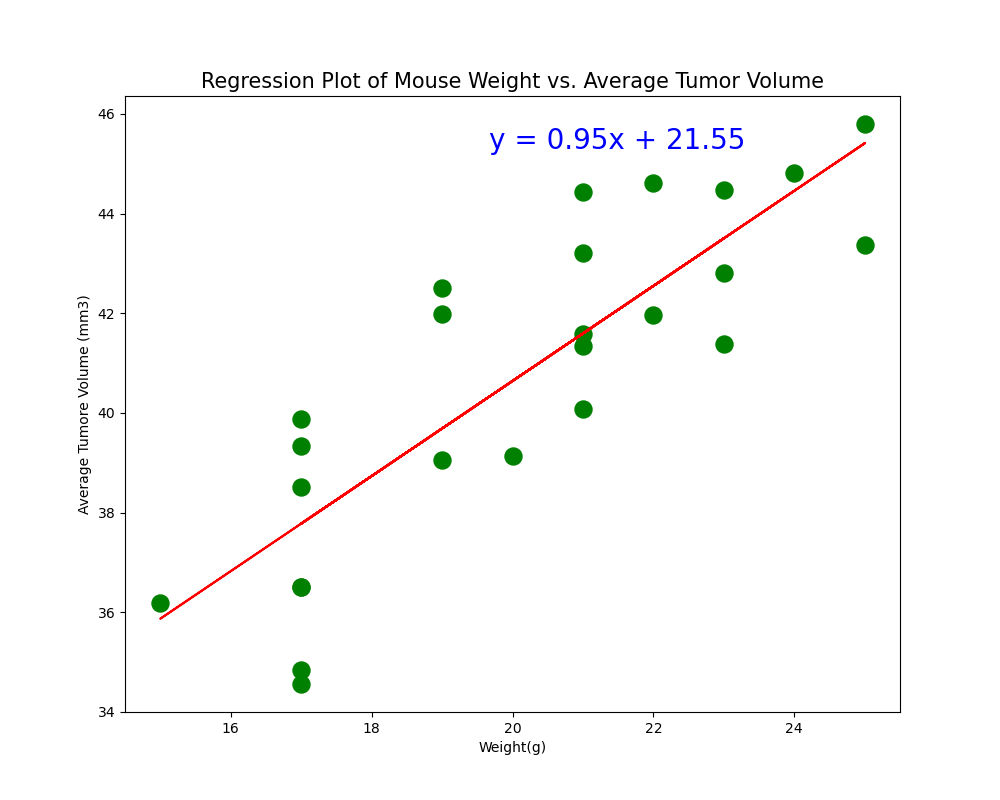

The r-squared is: 0.7088568047708717


In [72]:
# linear regession equation and plot
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values,y_values,s=150, color="green")
plt.plot(x_values,regression_values,"r-")
plt.title('Regression Plot of Mouse Weight vs. Average Tumor Volume',fontsize =15)
plt.xlabel('Weight(g)',fontsize =10)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression_plot.png", bbox_inches = "tight")
plt.show()